<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [3]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [4]:
xls=pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [5]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [6]:
client_info=pd.read_excel(xls,'CLIENT_INFO')
loan_history=pd.read_excel(xls,'LOAN_HISTORY')
marketing_history=pd.read_excel(xls,'MARKETING HISTORY')
subscription_history=pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [7]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [8]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [9]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [10]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [11]:
df=pd.merge(client_info,loan_history,on=['ID'])
df=pd.merge(df,marketing_history,on=['ID'])
df=pd.merge(df,subscription_history,on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df=df.drop(['ID'],axis=1)

### Task 4: Data Prep & Start H2O

In [13]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,6 months and 23 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_qeu9ct
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [14]:
h2o_df=h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [19]:
train,test=h2o_df.split_frame(ratios=[.75])

x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [21]:
from h2o.automl import H2OAutoML

In [24]:
aml=H2OAutoML(max_runtime_secs=600,balance_classes=True,stopping_metric='logloss',project_name='Final',seed=1)
%time aml.train(x=x,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 16s, sys: 1.13 s, total: 1min 18s
Wall time: 9min 51s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [25]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201207_214336,0.934499,0.218964,0.622477,0.164597,0.255146,0.0650997
XGBoost_grid__1_AutoML_20201207_214336_model_2,0.932871,0.19947,0.619326,0.166149,0.250274,0.0626369
StackedEnsemble_AllModels_AutoML_20201207_214336,0.932189,0.211139,0.618913,0.176938,0.252876,0.0639462
GBM_grid__1_AutoML_20201207_214336_model_1,0.931445,0.200873,0.608529,0.174848,0.251075,0.0630389
GBM_grid__1_AutoML_20201207_214336_model_2,0.931395,0.207676,0.611557,0.177851,0.255961,0.065516
XGBoost_grid__1_AutoML_20201207_214336_model_1,0.930141,0.203753,0.605743,0.181882,0.252291,0.0636509
XGBoost_3_AutoML_20201207_214336,0.930069,0.203521,0.608289,0.172421,0.251714,0.0633601
XGBoost_grid__1_AutoML_20201207_214336_model_5,0.929523,0.204691,0.609338,0.187066,0.251488,0.063246
GBM_2_AutoML_20201207_214336,0.928784,0.221612,0.59455,0.175938,0.264491,0.0699553
GBM_5_AutoML_20201207_214336,0.928693,0.239444,0.589303,0.17729,0.274859,0.0755477


In [34]:
se=aml.leader
metalearner=h2o.get_model(se.metalearner()['name'])

In [35]:
metalearner.varimp()

[('GBM_grid__1_AutoML_20201207_214336_model_1',
  0.7068642008367284,
  1.0,
  0.48014056959907403),
 ('XGBoost_grid__1_AutoML_20201207_214336_model_2',
  0.6717425617701056,
  0.9503134562125954,
  0.45628404416358026),
 ('DRF_1_AutoML_20201207_214336',
  0.03707452377908458,
  0.05244928762158102,
  0.025183030833691573),
 ('DeepLearning_grid__1_AutoML_20201207_214336_model_1',
  0.03501526127131028,
  0.04953605123850106,
  0.023784267857342813),
 ('XRT_1_AutoML_20201207_214336',
  0.021506064646440077,
  0.030424605774324043,
  0.014608087546311222),
 ('GLM_1_AutoML_20201207_214336', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [41]:
model =h2o.get_model('XGBoost_grid__1_AutoML_20201207_214336_model_2')

In [42]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06343895316991109
RMSE: 0.2518709057630736
LogLoss: 0.2004573856442463
Mean Per-Class Error: 0.12662553652854291
AUC: 0.9354604676985211
AUCPR: 0.633479673211823
Gini: 0.8709209353970422

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2018916316330433: 


,,no,yes,Error,Rate
0,no,8896.0,961.0,0.0975,(961.0/9857.0)
1,yes,275.0,1067.0,0.2049,(275.0/1342.0)
2,Total,9171.0,2028.0,0.1104,(1236.0/11199.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.201892,0.633234,248.0
1,max f2,0.095124,0.743357,304.0
2,max f0point5,0.370225,0.610978,181.0
3,max accuracy,0.370225,0.906777,181.0
4,max precision,0.981881,1.000000,0.0
5,max recall,0.001132,1.000000,396.0
6,max specificity,0.981881,1.000000,0.0
7,max absolute_mcc,0.194171,0.589096,251.0
8,max min_per_class_accuracy,0.138264,0.864563,280.0
9,max mean_per_class_accuracy,0.095124,0.873374,304.0



Gains/Lift Table: Avg response rate: 11.98 %, avg score: 11.31 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010001,0.865102,6.780319,6.780319,0.812500,0.909970,0.812500,0.909970,0.067809,0.067809,578.031855,578.031855
1,,2,0.020002,0.792770,6.333265,6.556792,0.758929,0.827897,0.785714,0.868934,0.063338,0.131148,533.326458,555.679157
2,,3,0.030003,0.726977,5.737193,6.283592,0.687500,0.758942,0.752976,0.832270,0.057377,0.188525,473.719262,528.359192
3,,4,0.040004,0.675653,6.109738,6.240128,0.732143,0.700276,0.747768,0.799271,0.061103,0.249627,510.973760,524.012834
4,,5,0.050004,0.628817,5.811702,6.154443,0.696429,0.653497,0.737500,0.770116,0.058122,0.307750,481.170162,515.444300
5,,6,0.100009,0.435041,4.276816,5.215630,0.512500,0.527212,0.625000,0.648664,0.213860,0.521610,327.681632,421.562966
6,,7,0.150013,0.275385,3.770155,4.733805,0.451786,0.352354,0.567262,0.549894,0.188525,0.710134,277.015515,373.380482
7,,8,0.200018,0.169304,2.384288,4.146426,0.285714,0.216947,0.496875,0.466657,0.119225,0.829359,138.428784,314.642558
8,,9,0.300027,0.066835,1.214497,3.169116,0.145536,0.109155,0.379762,0.347490,0.121461,0.950820,21.449662,216.911593
9,,10,0.400036,0.030025,0.312938,2.455071,0.037500,0.045321,0.294196,0.271948,0.031297,0.982116,-68.706222,145.507139


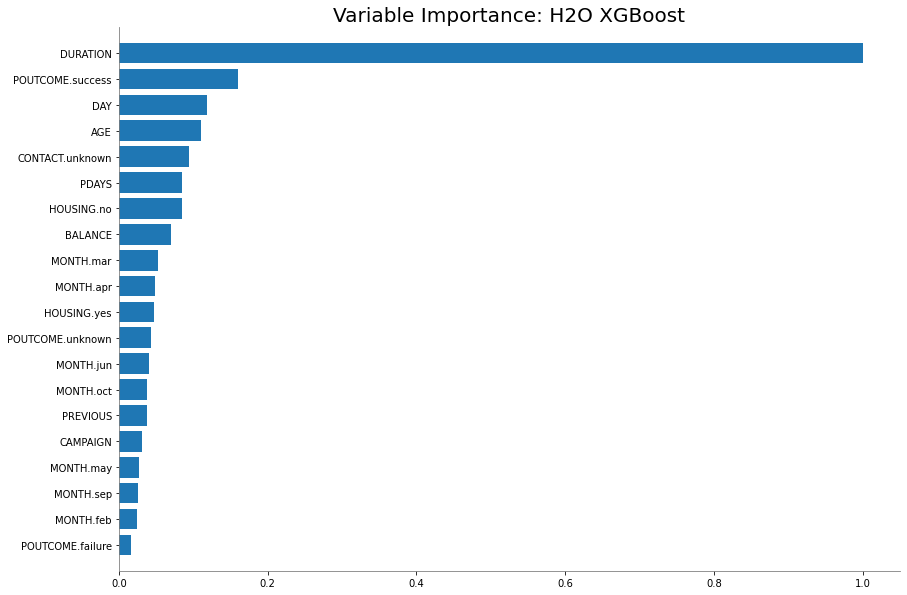

In [44]:
model.varimp_plot(num_of_features=20)

In [43]:
model.varimp_plot?

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20201207_214336_model_2


Model Summary: 


,,number_of_trees
0,,68.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05023589568218267
RMSE: 0.224133655844415
LogLoss: 0.16425405621572597
Mean Per-Class Error: 0.10534175783564292
AUC: 0.9573032182488149
AUCPR: 0.7592694112225947
Gini: 0.9146064364976298

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3629361169678824: 


,,no,yes,Error,Rate
0,no,28628.0,1437.0,0.0478,(1437.0/30065.0)
1,yes,1085.0,2862.0,0.2749,(1085.0/3947.0)
2,Total,29713.0,4299.0,0.0742,(2522.0/34012.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.362936,0.694155,189.0
1,max f2,0.174787,0.778966,266.0
2,max f0point5,0.512402,0.718063,137.0
3,max accuracy,0.456676,0.930642,155.0
4,max precision,0.979861,1.000000,0.0
5,max recall,0.000995,1.000000,397.0
6,max specificity,0.979861,1.000000,0.0
7,max absolute_mcc,0.362936,0.652823,189.0
8,max min_per_class_accuracy,0.177380,0.890604,265.0
9,max mean_per_class_accuracy,0.143049,0.894658,281.0



Gains/Lift Table: Avg response rate: 11.60 %, avg score: 11.61 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010026,0.881879,8.339204,8.339204,0.967742,0.921459,0.967742,0.921459,0.083608,0.083608,733.920413,733.920413
1,,2,0.020022,0.813413,7.628737,7.984492,0.885294,0.846513,0.926579,0.884041,0.076260,0.159868,662.873664,698.449202
2,,3,0.030019,0.750386,7.628737,7.866023,0.885294,0.779943,0.912831,0.849376,0.076260,0.236129,662.873664,686.602304
3,,4,0.040015,0.691519,6.741674,7.585142,0.782353,0.719537,0.880235,0.816940,0.067393,0.303522,574.167424,658.514237
4,,5,0.050012,0.644087,6.336160,7.335493,0.735294,0.667482,0.851264,0.787066,0.063339,0.366861,533.616000,633.549275
5,,6,0.100024,0.450859,5.273652,6.304572,0.611993,0.544426,0.731628,0.665746,0.263745,0.630606,427.365190,530.457233
6,,7,0.150006,0.289867,3.203562,5.271308,0.371765,0.366333,0.611721,0.565981,0.160122,0.790727,220.356250,427.130759
7,,8,0.200018,0.176158,2.016247,4.457423,0.233980,0.228878,0.517272,0.481693,0.100836,0.891563,101.624732,345.742290
8,,9,0.300012,0.066036,0.775318,3.230175,0.089974,0.110032,0.374853,0.357818,0.077527,0.969090,-22.468205,223.017487
9,,10,0.400006,0.029837,0.202698,2.473361,0.023522,0.045346,0.287027,0.279706,0.020269,0.989359,-79.730250,147.336116




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.06263686606671111
RMSE: 0.25027358243872067
LogLoss: 0.1994700668477942
Mean Per-Class Error: 0.13143456890612526
AUC: 0.9328714817751304
AUCPR: 0.6193264540208717
Gini: 0.8657429635502607

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2513701341607991: 


,,no,yes,Error,Rate
0,no,27486.0,2579.0,0.0858,(2579.0/30065.0)
1,yes,973.0,2974.0,0.2465,(973.0/3947.0)
2,Total,28459.0,5553.0,0.1044,(3552.0/34012.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.251370,0.626105,234.0
1,max f2,0.133124,0.733949,287.0
2,max f0point5,0.432720,0.604629,166.0
3,max accuracy,0.432720,0.908679,166.0
4,max precision,0.966808,0.863636,2.0
5,max recall,0.000584,1.000000,398.0
6,max specificity,0.983199,0.999967,0.0
7,max absolute_mcc,0.229241,0.578630,243.0
8,max min_per_class_accuracy,0.143772,0.864201,282.0
9,max mean_per_class_accuracy,0.094658,0.868565,308.0



Gains/Lift Table: Avg response rate: 11.60 %, avg score: 11.51 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010026,0.879756,7.075688,7.075688,0.821114,0.921013,0.821114,0.921013,0.070940,0.070940,607.568835,607.568835
1,,2,0.020022,0.805676,6.538917,6.807697,0.758824,0.841287,0.790015,0.881209,0.065366,0.136306,553.891712,580.769684
2,,3,0.030019,0.744518,6.006680,6.540953,0.697059,0.774108,0.759060,0.845543,0.060046,0.196352,500.667968,554.095264
3,,4,0.040015,0.688513,5.626510,6.312510,0.652941,0.716209,0.732550,0.813234,0.056245,0.252597,462.651008,531.250997
4,,5,0.050012,0.639867,4.866171,6.023412,0.564706,0.664302,0.699001,0.783465,0.048645,0.301241,386.617088,502.341221
5,,6,0.100024,0.438557,4.706266,5.364839,0.546149,0.534599,0.622575,0.659032,0.235369,0.536610,370.626572,436.483897
6,,7,0.150006,0.285834,3.604008,4.778125,0.418235,0.360313,0.554488,0.559498,0.180137,0.716747,260.400781,377.812533
7,,8,0.200018,0.174462,2.330336,4.166088,0.270429,0.224946,0.483463,0.475848,0.116544,0.833291,133.033609,316.608807
8,,9,0.300012,0.064414,1.076830,3.136436,0.124963,0.109080,0.363975,0.353604,0.107677,0.940968,7.683049,213.643646
9,,10,0.400006,0.030029,0.344586,2.438525,0.039988,0.044588,0.282984,0.276356,0.034457,0.975424,-65.541424,143.852508




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.89833,0.0027265898,0.9000441,0.8985742,0.8947368,0.89664805,0.90164655
1,auc,0.9329528,0.002252923,0.9329194,0.93158597,0.93218553,0.9312532,0.9368201
2,aucpr,0.61963034,0.010165651,0.6141007,0.61398137,0.6090271,0.63130224,0.62974036
3,err,0.10167006,0.0027265898,0.0999559,0.10142584,0.10526316,0.10335196,0.09835342
4,err_count,691.6,18.528357,680.0,690.0,716.0,703.0,669.0
5,f0point5,0.5760141,0.010234394,0.5870647,0.58368075,0.5614509,0.5709906,0.5768836
6,f1,0.62793773,0.00562673,0.6344086,0.63022506,0.6191489,0.62902373,0.6268823
7,f2,0.6903033,0.005983021,0.69005847,0.6848358,0.690064,0.700188,0.6863703
8,lift_top_group,7.0750227,0.45637408,6.858727,6.7029433,6.83351,7.1398263,7.8401074
9,logloss,0.19946983,0.004663879,0.20244865,0.20429038,0.19924186,0.19930224,0.19206604



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-12-07 21:47:55,53.321 sec,0.0,0.500000,0.693147,0.500000,0.116047,1.000000,0.883953
1,,2020-12-07 21:47:55,53.819 sec,5.0,0.275393,0.283905,0.912042,0.603835,7.357356,0.112460
2,,2020-12-07 21:47:56,54.024 sec,10.0,0.254803,0.225632,0.927096,0.634340,7.555824,0.102258
3,,2020-12-07 21:47:56,54.234 sec,15.0,0.247883,0.205363,0.934943,0.653888,7.656906,0.098083
4,,2020-12-07 21:47:56,54.532 sec,20.0,0.243644,0.194670,0.939672,0.668939,7.707446,0.095937
5,,2020-12-07 21:47:56,54.817 sec,25.0,0.240764,0.189139,0.942617,0.682385,7.884338,0.092908
6,,2020-12-07 21:47:57,55.046 sec,30.0,0.238737,0.185761,0.944396,0.692212,8.010690,0.086822
7,,2020-12-07 21:47:57,55.280 sec,35.0,0.236381,0.181942,0.946667,0.702195,7.985420,0.087499
8,,2020-12-07 21:47:57,55.526 sec,40.0,0.234148,0.178350,0.948848,0.712650,8.061231,0.088763
9,,2020-12-07 21:47:57,55.778 sec,45.0,0.232196,0.175517,0.950388,0.722349,8.137042,0.085734



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,DURATION,10089.458008,1.000000,0.430083
1,POUTCOME.success,1620.658447,0.160629,0.069084
2,DAY,1194.610474,0.118402,0.050923
3,AGE,1117.931519,0.110802,0.047654
4,CONTACT.unknown,952.508179,0.094406,0.040603
5,PDAYS,861.760071,0.085412,0.036734
6,HOUSING.no,858.373840,0.085076,0.036590
7,BALANCE,711.091431,0.070479,0.030312
8,MONTH.mar,535.779541,0.053103,0.022839
9,MONTH.apr,487.451843,0.048313,0.020779



See the whole table with table.as_data_frame()


Signature: model.varimp_plot(num_of_features=None, server=False)
Docstring:
Plot the variable importance for a trained model.

:param num_of_features: the number of features shown in the plot (default is 10 or all if less than 10).
:param server: ?

:returns: None.
File:      ~/.local/lib/python3.6/site-packages/h2o/model/model_base.py
Type:      method
